# Project description

Material Informatics is a very perspective field of knowledge. It allows to use machine learning technologies to obtain a new sense from a huge amount of gathered experimental data about mechanical properties of definite materials.

A determination of a dependency of material properties from a structure or a composition of a material is one of the core fundamental problems while new materials creation. This problem may be solved in the frame of Material Informatics with methods of machine learning. Given an experimental data about structure components and mechanical properties of existing (known) materials, one can build a ML-models to predict properties of some new material on the base of its structure.

We will consider "MatNavi Mechanical properties of low-alloy steels" dataset: https://www.kaggle.com/datasets/konghuanqing/matnavi-mechanical-properties-of-lowalloy-steels?resource=download
This dataset contains data about percentage of elements in a structure of definite low-alloy steels and some mechanical properties of these steels (proof stress, tensile strength, elongation, reduction in area).

The aim of this project is to build ML-model, which allows to predict proof stress, tensile strength, elongation, reduction in area of low-alloy steel with a given temperature and percentages of structural elements.
So we will build **multi-target regression model** in the frame of this project.

# 1. Imports and loading data

In [1]:
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/ElenaNKn/ml-zoomcamp-solutions/master/capstone_project/mechanical_properties_low-alloy_steels.csv'
filename = 'mechanical_properties_low-alloy_steels.csv'
urllib.request.urlretrieve(url, filename)

In [2]:
df = pd.read_csv('mechanical_properties_low-alloy_steels.csv', header=0, sep=',')

In [3]:
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


# 2. Data handling and exploratory data analysis

## 2.1. Data preparation

In [4]:
# handle headers of a dataframe

df.columns = df.columns.str.lower().str.lstrip()
df.columns = df.columns.str.replace('+', 'and', regex=True).str.replace('°c', 'celcius', regex=True)
df.columns = df.columns.str.replace('0.2% ', '', regex=True).str.replace('%', 'perc', regex=True)
df.columns = df.columns.str.replace(' ', '_').str.replace('+', 'and', regex=True)
df.columns = df.columns.str.replace('(', '', regex=True).str.replace(')', '', regex=True)

In [5]:
df.head()

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,ceq,nb_and_ta,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [6]:
df.isnull().sum()   # checking for missing values

alloy_code                0
c                         0
si                        0
mn                        0
p                         0
s                         0
ni                        0
cr                        0
mo                        0
cu                        0
v                         0
al                        0
n                         0
ceq                       0
nb_and_ta                 0
temperature_celcius       0
proof_stress_mpa          0
tensile_strength_mpa      0
elongation_perc           0
reduction_in_area_perc    0
dtype: int64

In [7]:
df.dtypes    # checking types of columns

alloy_code                 object
c                         float64
si                        float64
mn                        float64
p                         float64
s                         float64
ni                        float64
cr                        float64
mo                        float64
cu                        float64
v                         float64
al                        float64
n                         float64
ceq                       float64
nb_and_ta                 float64
temperature_celcius         int64
proof_stress_mpa            int64
tensile_strength_mpa        int64
elongation_perc             int64
reduction_in_area_perc      int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,915.0,0.174929,0.059674,0.0900,0.1300,0.1600,0.200,0.3400
si,915.0,0.310918,0.086871,0.1800,0.2400,0.3000,0.370,0.5200
mn,915.0,0.812962,0.342775,0.4200,0.5000,0.6800,1.210,1.4800
p,915.0,0.014543,0.005244,0.0060,0.0100,0.0140,0.018,0.0300
s,915.0,0.010602,0.004024,0.0030,0.0080,0.0100,0.012,0.0220
ni,915.0,0.143016,0.172746,0.0000,0.0230,0.0500,0.210,0.6000
cr,915.0,0.427861,0.457568,0.0000,0.0400,0.1100,1.000,1.3100
mo,915.0,0.442870,0.394383,0.0050,0.0500,0.5000,0.560,1.3500
cu,915.0,0.079148,0.058481,0.0000,0.0400,0.0700,0.110,0.2500
v,915.0,0.060190,0.096403,0.0000,0.0000,0.0000,0.070,0.3000


Let's explore, what the content of dataframe columns is.

First columns are percentage of definite chemical elements in steels:
C - Carbon
Si - Silicon
Mn - Manganese
P - Phosphorus
S - Sulfur
Ni - Nickel
Cr - Chromium
Mo - Molybdenum
Cu - Copper
V - Vanadium
Al - Aluminum
N - Nitrogen
Nb - Niobium
Ta is likely an error name. The thing is that there is no element like "Ta" in the periodic table. But low-alloy steel may contain Titanium ("Ti") (https://www.matweb.com/search/datasheet_print.aspx?matguid=d1bdbccde4da4da4a9dbb8918d783b29).

Let's correct this error in a dataframe head

In [9]:
df.columns = df.columns.str.lower().str.replace('ta', 'ti')

Now let's explore, what "ceq" is.

As follows from https://www.kobelco-welding.jp/education-center/abc/ABC_2007-01.html "Ceq" is an coefficient which is called "Carbon equivalent". It assess the effect of composition while welding of low alloy steels. It is calculated by the formula 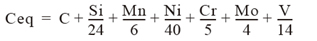

So "ceq" is calculated from other features of our dataset and we need to exclude it.

In [10]:
del df['ceq']

Now let's explore our dataset ones again 

In [11]:
df.head(n=22)

,alloy_code,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,400,316,489,26,79
5,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,450,287,461,25,81
6,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,500,274,431,28,85
7,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,550,262,387,32,87
8,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,600,220,314,42,88
9,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,650,152,226,59,92


The first column of our dataframe is an alloy code. So the first 10 rows of dataframe contains values of tensile stress for the first material (MBB) with different temperatures, the next 10 rows - for the second material and so on.

Alloy code is very important for engineering task, but in the ML model it brings no actual sence. It just makes sence for model that **material with given percentage of elements and temperature have this value of tensile strength**. That is why it's reasonably to exclude "alloy_code" column out of the dataframe.

In [12]:
del df['alloy_code']

The dataframe is ready to perform further analysis.

In [13]:
df

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,27,342,490,30,71
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,100,338,454,27,72
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,200,337,465,23,69
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,300,346,495,21,70
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,350,268,632,28,65
911,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,400,244,575,28,68
912,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,450,224,500,29,72
913,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0017,500,209,428,30,78


## 2.2. Setting up the validation framework

In [14]:
# create list of feature columns names
list_features = [
    'c', 'si', 'mn', 'p', 's', 'ni', 'cr',
    'mo', 'cu', 'v', 'al', 'n',
    'nb_and_ti', 'temperature_celcius'
    ]

# create list of target columns names

list_targets = [
    'proof_stress_mpa', 'tensile_strength_mpa',
    'elongation_perc', 'reduction_in_area_perc'
    ]

In [15]:
# splitting into train - val - test datasets

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [16]:
len(df_train), len(df_val), len(df_test)

(549, 183, 183)

In [17]:
# create dataframes for feature variables

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
df_train_with_target = df_train.copy()  # store this matrix for correlation analysis

In [19]:
# create dataframes for target variables

y_train = df_train[list_targets]
y_val = df_val[list_targets]
y_test = df_test[list_targets]

df_train.drop(list_targets, axis=1, inplace=True)
df_val.drop(list_targets, axis=1, inplace=True)
df_test.drop(list_targets, axis=1, inplace=True)

# 2.3. Feature importance analysis

As all features and targets in our dataframe are numerical, we will explore correlation of variables

In [20]:
df_train_corr = df.corr()
df_train_corr

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti,temperature_celcius,proof_stress_mpa,tensile_strength_mpa,elongation_perc,reduction_in_area_perc
c,1.000000,-0.406268,0.031015,0.057410,0.012504,0.285788,0.018243,0.255056,0.370774,0.385099,-0.263321,0.035579,0.131773,-0.025522,0.198420,0.123722,-0.148794,-0.277629
si,-0.406268,1.000000,0.223586,0.138152,-0.075110,-0.079105,0.117414,-0.027114,-0.104919,0.199058,0.390031,-0.122928,-0.155321,0.037010,0.269033,0.066060,-0.124037,0.161944
mn,0.031015,0.223586,1.000000,0.243866,-0.046163,0.454195,-0.474269,-0.405436,0.104023,0.007679,0.694037,-0.236880,0.193360,-0.022865,0.399340,0.115703,-0.123131,0.103369
p,0.057410,0.138152,0.243866,1.000000,0.179914,-0.143954,-0.138566,-0.386247,-0.022641,-0.081315,0.253681,-0.255824,0.283206,-0.029672,-0.042454,0.014310,0.127121,0.037407
s,0.012504,-0.075110,-0.046163,0.179914,1.000000,0.066504,0.006354,-0.054794,0.086668,0.048468,0.142494,-0.171404,-0.023504,-0.003932,0.021205,0.049277,-0.042973,-0.127908
ni,0.285788,-0.079105,0.454195,-0.143954,0.066504,1.000000,0.125985,0.332420,0.578134,0.341024,0.163561,0.132059,-0.102744,0.035333,0.474990,0.141140,-0.291701,-0.019360
cr,0.018243,0.117414,-0.474269,-0.138566,0.006354,0.125985,1.000000,0.795223,0.199199,0.631938,-0.395500,0.454140,-0.131404,0.092325,0.254899,0.122122,-0.303170,-0.053949
mo,0.255056,-0.027114,-0.405436,-0.386247,-0.054794,0.332420,0.795223,1.000000,0.296401,0.722976,-0.484443,0.348385,-0.169583,0.086194,0.361247,0.172995,-0.411885,-0.173894
cu,0.370774,-0.104919,0.104023,-0.022641,0.086668,0.578134,0.199199,0.296401,1.000000,0.294993,-0.262760,0.201425,-0.185688,0.024749,0.200388,0.066212,-0.178647,-0.179090
v,0.385099,0.199058,0.007679,-0.081315,0.048468,0.341024,0.631938,0.722976,0.294993,1.000000,-0.122061,0.232178,-0.086649,0.066731,0.636588,0.300307,-0.501546,-0.210469


<AxesSubplot: >

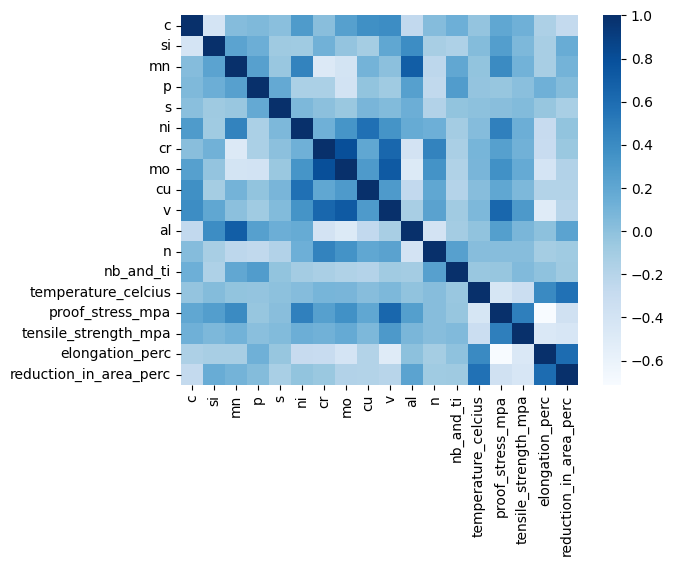

In [21]:
sb.heatmap(df_train_corr, cmap="Blues")

From the heatmap above we see that there is strong correlation between some target variables: elongation and reduction_in_area, proof_stress and elongation. These results are rather expectable.

But there are more specific questions, that are concernes with the task of our project:

-- is there any correlation between elements?

-- how elements affect target variables?

Let's consider the first question

In [22]:
list_elem = list_features
list_elem.remove('temperature_celcius')
df_train_feature_corr = df[list_features].corr()
df_train_feature_corr

,c,si,mn,p,s,ni,cr,mo,cu,v,al,n,nb_and_ti
c,1.000000,-0.406268,0.031015,0.057410,0.012504,0.285788,0.018243,0.255056,0.370774,0.385099,-0.263321,0.035579,0.131773
si,-0.406268,1.000000,0.223586,0.138152,-0.075110,-0.079105,0.117414,-0.027114,-0.104919,0.199058,0.390031,-0.122928,-0.155321
mn,0.031015,0.223586,1.000000,0.243866,-0.046163,0.454195,-0.474269,-0.405436,0.104023,0.007679,0.694037,-0.236880,0.193360
p,0.057410,0.138152,0.243866,1.000000,0.179914,-0.143954,-0.138566,-0.386247,-0.022641,-0.081315,0.253681,-0.255824,0.283206
s,0.012504,-0.075110,-0.046163,0.179914,1.000000,0.066504,0.006354,-0.054794,0.086668,0.048468,0.142494,-0.171404,-0.023504
ni,0.285788,-0.079105,0.454195,-0.143954,0.066504,1.000000,0.125985,0.332420,0.578134,0.341024,0.163561,0.132059,-0.102744
cr,0.018243,0.117414,-0.474269,-0.138566,0.006354,0.125985,1.000000,0.795223,0.199199,0.631938,-0.395500,0.454140,-0.131404
mo,0.255056,-0.027114,-0.405436,-0.386247,-0.054794,0.332420,0.795223,1.000000,0.296401,0.722976,-0.484443,0.348385,-0.169583
cu,0.370774,-0.104919,0.104023,-0.022641,0.086668,0.578134,0.199199,0.296401,1.000000,0.294993,-0.262760,0.201425,-0.185688
v,0.385099,0.199058,0.007679,-0.081315,0.048468,0.341024,0.631938,0.722976,0.294993,1.000000,-0.122061,0.232178,-0.086649


<AxesSubplot: >

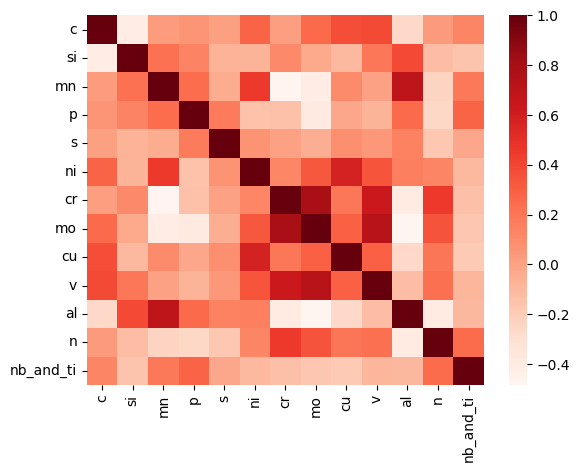

In [23]:
sb.heatmap(df_train_feature_corr, cmap="Reds")

We see that there are certain correspondence in between quantity of some elements in low-alloyed steels: Mo and Cr (0.795), Mo and V (0.723), Al and Mn (0.694). The correspondence is straight, i.e. if an amount of one elemet is low/high, then there is little/more the other element.

Now lets check, if there is correlation between percentage of some certain elements and mechanical properties of steels

In [24]:
for t in list_targets:
    print("Correlation with {}".format(t))
    cor = df_train_with_target[list_elem].corrwith(df_train_with_target[t]).abs().sort_values(ascending=False)
    print(cor)

Correlation with proof_stress_mpa
v            0.624100
ni           0.448555
mn           0.400547
mo           0.350559
al           0.261610
cr           0.253600
si           0.234250
c            0.230580
cu           0.207402
nb_and_ti    0.037400
s            0.022998
p            0.016374
n            0.011270
dtype: float64
Correlation with tensile_strength_mpa
v            0.288490
mo           0.170360
cr           0.133460
c            0.117081
ni           0.104478
mn           0.084734
cu           0.071323
al           0.069708
s            0.065404
si           0.052673
nb_and_ti    0.037037
n            0.030036
p            0.027474
dtype: float64
Correlation with elongation_perc
v            0.510107
mo           0.434646
cr           0.324850
ni           0.290902
cu           0.198448
c            0.177157
n            0.132001
mn           0.127592
p            0.125720
si           0.074280
s            0.049223
nb_and_ti    0.011495
al           0.003635
dtype: 

Results obtained shows that there is no direct correspondence between presence of certain chemical elements and tensile stress of a low-aloy steel or its reduction in area. This doesn't mean that these elements don't affect mechanical properties of a steel. But this means that correspondence in between structure composition of a steel and it's mechanical properties is more complicated than just a straingt dependency from certain element. More ower, it can be expected that, **mechanical properties of a steel are affected by combination of elements**. That is why methods of machine learning may be more effective in mechanical properties prediction task then other mathematical analusis methods.

The results obtained also shows that presence of vanadium affects proof_stress and elongation more than presence of other elements.